# 911 Calls Data Exploration

In this project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [5]:
#Required Imports
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Importing The Data Into Dataframe
call_data = pd.read_csv('911.csv')
call_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
call_data.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Basic Exploration

** What are the top 5 zipcodes for 911 calls? **

In [8]:
call_data['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [9]:
call_data['twp'].value_counts()[:5]

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** How many unique title codes are there? **

In [10]:
call_data['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic.Let's use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [11]:
call_data['reason'] = call_data['title'].apply(lambda title:title.split(':')[0])

** What is the most common Reason for a 911 call based off of this new column? **

In [12]:
call_data['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

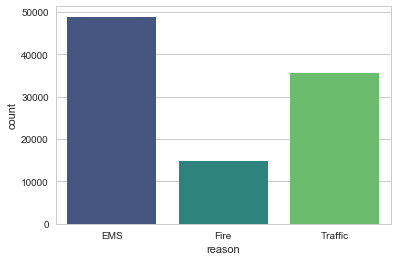

In [13]:
sns.countplot(call_data['reason'], palette='viridis')

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [14]:
type(call_data['timeStamp'][0])

str

** Lets use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [15]:
call_data['timeStamp'] = pd.to_datetime(call_data['timeStamp'])

** Now that the timestamp column are actually DateTime objects, we can use .apply() to create 3 new columns called Hour, Month, and Day of Week.**

In [16]:
call_data['hour'] = call_data['timeStamp'].apply(lambda data : data.hour) 
call_data['month'] =  call_data['timeStamp'].apply(lambda data : data.month) 
call_data['day of week'] = call_data['timeStamp'].apply(lambda data : data.dayofweek)

** Now that the Day of Week is an integer 0-6. we can use the .map() with this dictionary to map the actual string names to the day of the week: **

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
call_data['day of week'] = call_data['day of week'].map(dmap)

** Now let's use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

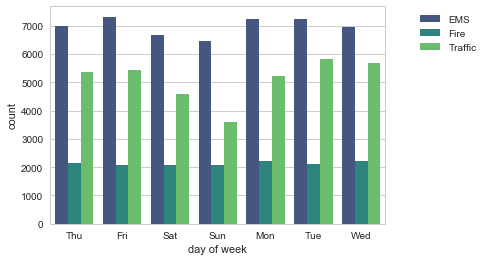

In [18]:
sns.countplot(data=call_data, x='day of week', hue='reason', palette='viridis')
plt.legend(loc=0, bbox_to_anchor=(1.3, 1))

**Now Let's do the same for Month:**

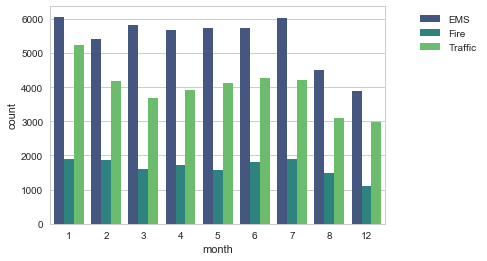

In [19]:
sns.countplot(data=call_data, x='month', hue='reason', palette='viridis')
plt.legend(loc=0, bbox_to_anchor=(1.3, 1))

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [20]:
by_month = call_data.groupby('month').count()
by_month

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

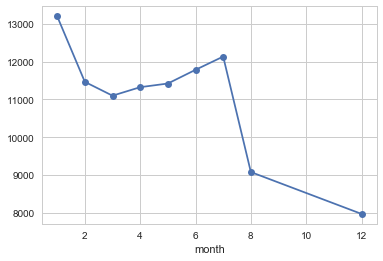

In [21]:
by_month['e'].plot.line(marker='o')

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

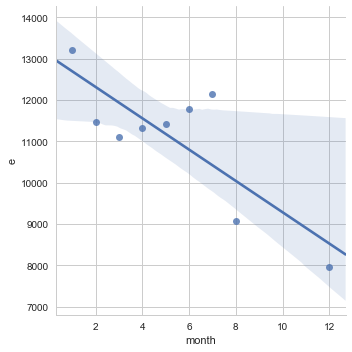

In [22]:
by_month = by_month.reset_index()
sns.lmplot(data=by_month, x='month', y='e')

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [23]:
call_data['date'] = call_data['timeStamp'].apply(lambda data:data.date())

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

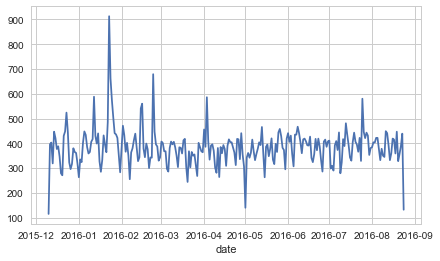

In [24]:
call_data_by_date = call_data.groupby('date').count()
call_data_by_date['e'].plot.line(figsize=(7,4))

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

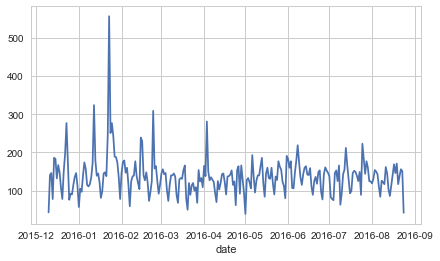

In [25]:
call_data_by_date_Traffic = call_data[call_data['reason'] == 'Traffic'].groupby('date').count()
call_data_by_date_Traffic['e'].plot.line(figsize=(7,4))

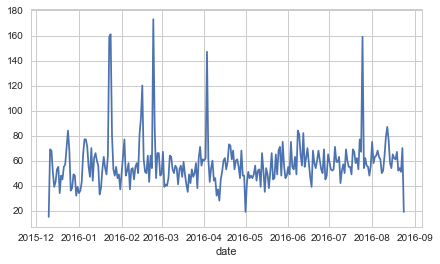

In [26]:
call_data_by_date_Fire = call_data[call_data['reason'] == 'Fire'].groupby('date').count()
call_data_by_date_Fire['e'].plot.line(figsize=(7,4))

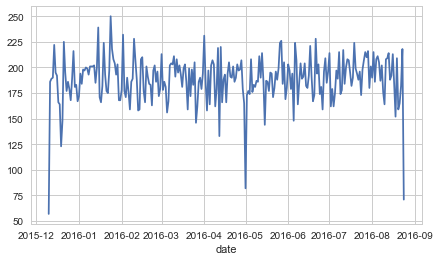

In [27]:
call_data_by_date_EMS = call_data[call_data['reason'] == 'EMS'].groupby('date').count()
call_data_by_date_EMS['e'].plot.line(figsize=(7,4))

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [28]:
dayhour = call_data.groupby(['day of week', 'hour']).count()['e'].unstack()

** Now create a HeatMap using this new DataFrame. **

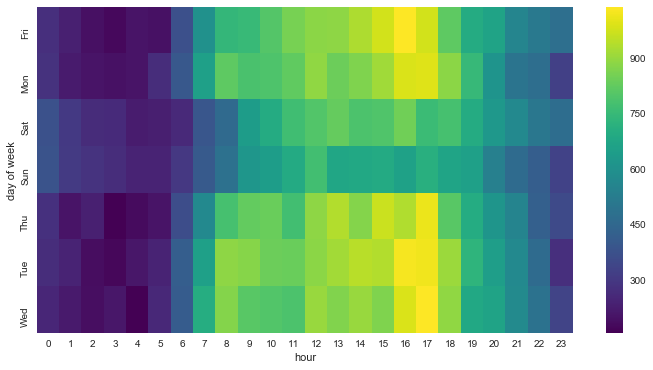

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(dayhour, cmap='viridis')

** Now create a clustermap using this DataFrame. **

<Figure size 864x432 with 0 Axes>

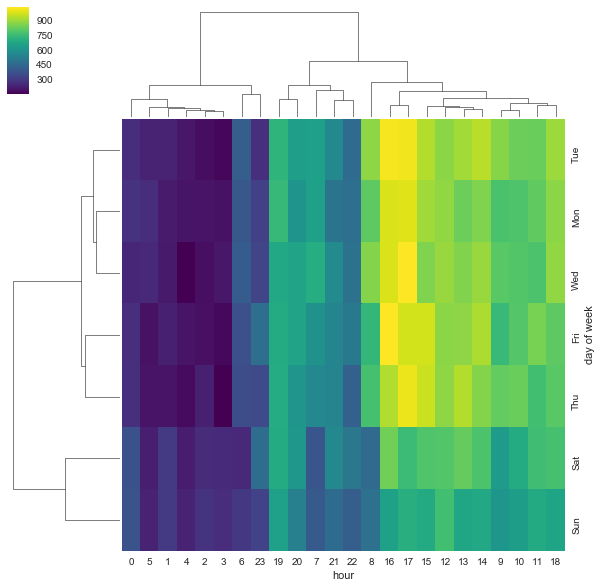

In [31]:
plt.figure(figsize=(12,6))
sns.clustermap(dayhour, cmap='viridis')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [95]:
call_data.pivot_table(index = 'day of week', columns='month', values='e')

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,1,1,1,1,1,1,1,1,1
Mon,1,1,1,1,1,1,1,1,1
Sat,1,1,1,1,1,1,1,1,1
Sun,1,1,1,1,1,1,1,1,1
Thu,1,1,1,1,1,1,1,1,1
Tue,1,1,1,1,1,1,1,1,1
Wed,1,1,1,1,1,1,1,1,1


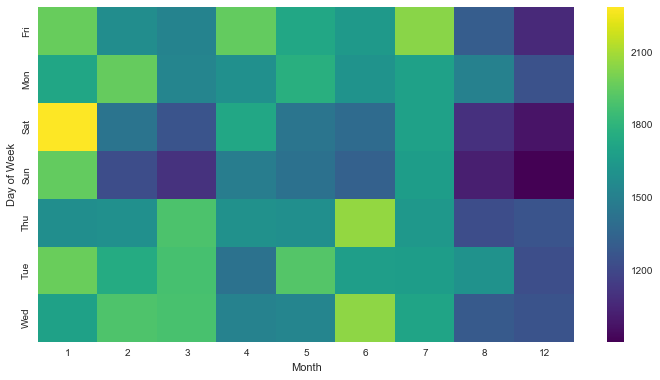

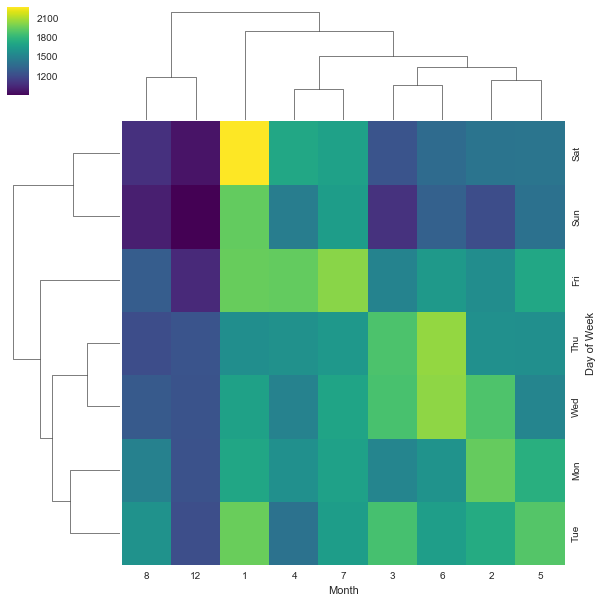